# Capstone Project

## Modeling Notebook - `LogisticRegression`  `COMBINED DATASET` from 10/24/19

### - Using `Unprocessed Versions of PREOP COMBINED DATASET` as of 10/31/19

### - Includes Hyperparameter Tuning and Classifier Evaluation Charts

#### Importing Libraries

In [1]:
%matplotlib inline

# general libraries
import re
import string
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing date libraries
import datetime as dt
import dateutil.parser as dparser

# scikit-learn libraries for preprocessing
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

# scikit-learn libraries for constructing pipelines
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.base import clone

# scikit-learn libraries for clustering and dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture

# scikit-learn libraries for evaluation
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# scikit-learn libraries for feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import RFECV

# scikit-learn libraries for learning
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_validate, cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# saving models
import pickle
from sklearn.externals import joblib

# setting pandas display options
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 10000)
pd.set_option('display.max_colwidth', 100)
pd.set_option('precision', 5)
pd.options.mode.chained_assignment = None

/Users/nate_velarde/anaconda/envs/py3jp/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


#### Directory/File Structure

In [2]:
sys.version

'3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [3]:
print ('Running pandas version:', pd.__version__)
print ('Running numpy version:', np.__version__)
print ('Running sklearn version:', sklearn.__version__)

Running pandas version: 0.25.1
Running numpy version: 1.14.2
Running sklearn version: 0.21.3


In [4]:
os.getcwd()

'/Users/nate_velarde/Documents/UC_Berkeley/Courses/W210_Capstone/stroke_project/sandbox/notebooks'

In [5]:
os.chdir('../data')

In [6]:
sorted(os.listdir())

['.DS_Store',
 '273_vs_281_null_count_by_feature.csv',
 '273_vs_281_null_count_by_feature.xlsm',
 'Capstone - Complication list - complete.xlsx',
 'Capstone - STS risk factor list.xlsx',
 'Capstone_Fall_Shannon_Sept2019_request.csv',
 'PREOP_dataset_10_24.pkl',
 'PREOP_dataset_10_27.pkl',
 'PREOP_dataset_TREE_10_24.pkl',
 'PREOP_dataset_TREE_10_27.pkl',
 'X_A_DREF.pkl',
 'X_A_DREF_TREE_SKLEARN.pkl',
 'X_PREOP_10_24.pkl',
 'X_PREOP_10_27.pkl',
 'X_PREOP_TREE_10_24.pkl',
 'X_PREOP_TREE_10_27.pkl',
 'X_dev_A_DREF.pkl',
 'X_dev_A_DREF_TREE_SKLEARN.pkl',
 'X_dev_PREOP_10_24.pkl',
 'X_dev_PREOP_10_27.pkl',
 'X_dev_PREOP_TREE_10_24.pkl',
 'X_dev_PREOP_TREE_10_27.pkl',
 'X_dev_PREOP_TREE_UNPROC_10_27.pkl',
 'X_dev_PREOP_UNPROC_10_24.pkl',
 'X_dev_PREOP_UNPROC_10_27.pkl',
 'X_dev_PREOP_UNPROC_10_31_THRESH.pkl',
 'X_test_A_DREF.pkl',
 'X_test_A_DREF_TREE_SKLEARN.pkl',
 'X_test_PREOP_10_24.pkl',
 'X_test_PREOP_10_27.pkl',
 'X_test_PREOP_TREE_10_24.pkl',
 'X_test_PREOP_TREE_10_27.pkl',
 'X_test_PR

### Loading Datasets
- Going to load the unprocessed versions of our data in order to run through pipelines

#### `X_train`, `y_train`, `predstro_train`
- designation of `_all` denotes complete feature set

In [7]:
X_train_all = pd.read_pickle('X_train_PREOP_UNPROC_10_31_THRESH.pkl')
y_train = pd.read_pickle('y_train_PREOP_UNPROC_10_31_THRESH.pkl')
predstro_train = pd.read_pickle('predstro_train_10_31.pkl')

In [8]:
X_train_all.shape, y_train.shape, predstro_train.shape

((34192, 110), (34192,), (34192,))

#### `X_dev`, `y_dev`, `predstro_dev`
- designation of `_all` denotes complete feature set

In [9]:
X_dev_all = pd.read_pickle('X_dev_PREOP_UNPROC_10_31_THRESH.pkl')
y_dev = pd.read_pickle('y_dev_PREOP_UNPROC_10_31_THRESH.pkl')
predstro_dev = pd.read_pickle('predstro_dev_10_31.pkl')

In [10]:
X_dev_all.shape, y_dev.shape, predstro_dev.shape

((4274, 110), (4274,), (4274,))

#### `X_test`, `y_test`, `predstro_test`
- designation of `_all` denotes complete feature set

In [11]:
X_test_all = pd.read_pickle('X_test_PREOP_UNPROC_10_31_THRESH.pkl')
y_test = pd.read_pickle('y_test_PREOP_UNPROC_10_31_THRESH.pkl')
predstro_test = pd.read_pickle('predstro_test_10_31.pkl')

In [12]:
X_test_all.shape, y_dev.shape, predstro_test.shape

((4274, 110), (4274,), (4274,))

- validating row count for `COMBINED DATASET` from 10/27/19 - `42,740` total observations

In [13]:
42740 - X_train_all.shape[0] - X_dev_all.shape[0] - X_test_all.shape[0]

0

- last look at the data (`X_train_all`) before modeling

In [14]:
X_train_all.head()

,age,heightcm,weightkg,bmi,hct,creatlst,totalbumin,a1clvl,meldscr,hdef,pasys,surgdt_month_Jan,surgdt_month_Feb,surgdt_month_Mar,surgdt_month_Apr,surgdt_month_May,surgdt_month_Jul,surgdt_month_Aug,surgdt_month_Sep,surgdt_month_Oct,surgdt_month_Nov,surgdt_month_Dec,surgdt_DayOfWeek_Mon,surgdt_DayOfWeek_Tues,surgdt_DayOfWeek_Thurs,surgdt_DayOfWeek_Fri,surgdt_DayOfWeek_Sat,surgdt_DayOfWeek_Sun,surgdt_PartOfMonth_Beg,surgdt_PartOfMonth_End,gender,racecaucasian,raceblack,raceasian,racenativeam,racnativepacific,ethnicity,diabetes,dyslip,dialysis,hypertn,infendo,slpapn,liverdis,immsupp,mediastrad,cancer,pvd,syncope,unrespstat,cvd,cva,cvdtia,cvdpcarsurg,hitanti,prcvint,prcab,prvalve,chf,priorhf,arrhyafib,medinotr,hdefd,vdaort,vdstena,vdstenm,diabctrl,infendty,Tobacco_Combined,chrlungd,hmo2,ivdrugab,alcohol,carshock24,resusc24,medasa,medaplt5days,medlipid,numdisv_1_CORONARY,numdisv_2_CORONARIES,numdisv_3_CORONARIES,anginalclass_STRENUOUS_ACTIVITY,anginalclass_SLIGHT_LIMITATION_ACTIVITY,anginalclass_MARKED_LIMITATION_ACTIVITY,anginalclass_ANGINA_AT_REST,classnyh_SLIGHT_LIMITATION,classnyh_MARKED_LIMITATION,classnyh_ANY_ACTIVITY,vdinsufm_TRIVIAL,vdinsufm_MILD,vdinsufm_MODERATE,vdinsufm_SEVERE,vdinsuft_TRIVIAL,vdinsuft_MILD,vdinsuft_MODERATE,vdinsuft_SEVERE,incidencREOP_FIRST,incidencREOP_SECOND,incidencREOP_THIRD,incidencREOP_FOURTH,status_URGENT,status_EMERGENCY,status_SALVAGE,cvdcarsten_RIGHT,cvdcarsten_LEFT,cvdcarsten_BOTH,cvdstenrt_80-99%,cvdstenrt_100%,cvdstenlft_80-99%,cvdstenlft_100%
0,43,172.7,96.2,32.25451,24.4,0.81,2.6,4.1,15.42,65.0,71.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,78,162.5,69.9,26.47101,38.2,1.01,NaN,6.7,NaN,57.0,41.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0.0,0.0,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,64,188.0,121.5,34.37641,42.0,0.90,3.6,6.8,6.40,60.0,NaN,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,71,168.0,85.0,30.11621,42.0,0.90,NaN,5.3,NaN,55.0,30.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,58,160.0,93.4,36.48438,27.0,0.80,NaN,6.9,NaN,60.0,29.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [15]:
X_train_all.tail()

,age,heightcm,weightkg,bmi,hct,creatlst,totalbumin,a1clvl,meldscr,hdef,pasys,surgdt_month_Jan,surgdt_month_Feb,surgdt_month_Mar,surgdt_month_Apr,surgdt_month_May,surgdt_month_Jul,surgdt_month_Aug,surgdt_month_Sep,surgdt_month_Oct,surgdt_month_Nov,surgdt_month_Dec,surgdt_DayOfWeek_Mon,surgdt_DayOfWeek_Tues,surgdt_DayOfWeek_Thurs,surgdt_DayOfWeek_Fri,surgdt_DayOfWeek_Sat,surgdt_DayOfWeek_Sun,surgdt_PartOfMonth_Beg,surgdt_PartOfMonth_End,gender,racecaucasian,raceblack,raceasian,racenativeam,racnativepacific,ethnicity,diabetes,dyslip,dialysis,hypertn,infendo,slpapn,liverdis,immsupp,mediastrad,cancer,pvd,syncope,unrespstat,cvd,cva,cvdtia,cvdpcarsurg,hitanti,prcvint,prcab,prvalve,chf,priorhf,arrhyafib,medinotr,hdefd,vdaort,vdstena,vdstenm,diabctrl,infendty,Tobacco_Combined,chrlungd,hmo2,ivdrugab,alcohol,carshock24,resusc24,medasa,medaplt5days,medlipid,numdisv_1_CORONARY,numdisv_2_CORONARIES,numdisv_3_CORONARIES,anginalclass_STRENUOUS_ACTIVITY,anginalclass_SLIGHT_LIMITATION_ACTIVITY,anginalclass_MARKED_LIMITATION_ACTIVITY,anginalclass_ANGINA_AT_REST,classnyh_SLIGHT_LIMITATION,classnyh_MARKED_LIMITATION,classnyh_ANY_ACTIVITY,vdinsufm_TRIVIAL,vdinsufm_MILD,vdinsufm_MODERATE,vdinsufm_SEVERE,vdinsuft_TRIVIAL,vdinsuft_MILD,vdinsuft_MODERATE,vdinsuft_SEVERE,incidencREOP_FIRST,incidencREOP_SECOND,incidencREOP_THIRD,incidencREOP_FOURTH,status_URGENT,status_EMERGENCY,status_SALVAGE,cvdcarsten_RIGHT,cvdcarsten_LEFT,cvdcarsten_BOTH,cvdstenrt_80-99%,cvdstenrt_100%,cvdstenlft_80-99%,cvdstenlft_100%
34187,63,177.8,105.6,33.40415,39.0,0.90,NaN,7.5,NaN,53.0,41.7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
34188,54,178.0,86.4,27.26928,36.0,0.70,2.7,7.2,10.00,14.0,52.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
34189,73,160.0,93.0,36.32812,37.0,1.07,3.6,4.9,7.05,70.0,NaN,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
34190,77,155.0,105.0,43.70447,37.7,0.70,4.1,7.8,6.40,60.0,56.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34191,64,178.0,104.0,32.82414,35.0,1.10,3.7,10.7,7.30,63.0,27.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Pre-processing Data using `Scikit-Learn` `Pipelines`

### Creating a `FeatureSelector` transformer
- necessary because we are working with heterogeneous data (numerical and categorical features) -- want to be able to pick and choose which features (columns) to pass through our pipelines (and transform them) instead of having to pass through the whole dataframe

In [16]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    '''
    Transformer to select column from a data frame to perform additional transformations on
    Use this for selecting column(s) that require fit transform
    '''
    
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[data_dict.columns.intersection(self.key)]

- create `lists` of `numerical_features` and `categorical_features` to use to mask/select features from dataset

In [17]:
numerical_features = ['age',
                      'heightcm',
                      'weightkg',
                      'bmi',
                      'hct',
                      'creatlst',
                      'totalbumin',
                      'a1clvl',
                      'meldscr',
                      'hdef',
                      'pasys']

- `categorical_features` are the subset of the whole feature set that are `not in` `numerical_features`
- use `np.setdiff1d` to identify elements in one list that are not in another

In [18]:
categorical_features = list(np.setdiff1d(X_train_all.columns.tolist(), 
                                        numerical_features,
                                        assume_unique=True))

In [19]:
print (len(numerical_features))
print (len(categorical_features))
print (len(numerical_features) + len(categorical_features))
print (X_train_all.shape[1])

11
99
110
110


## Functions Used in Pipelines

#### `SimpleImputer(missing_values=np.nan, strategy='median'` 
- to replace numerical feature `NaN`s with `X_train` numerical feature `NaN`s

#### `PolynomialFeatures()`
- per Albon 13.2 pages 225-227, can use `PolynomialFeatures()` to create interaction terms
- Parameter `interaction_only=True` tells `PolynomialFeatures()` to ONLY return interaction terms (and not polynomial features
- By default, `PolynomialFeatures()` will add a feature containing ones (a vector of `1`s) called a `bias` -- we can prevent that through the parameter `include_bias=False`
- The `degree` parameter determines the maximum number of features to create interaction terms from (in case we wanted to create an interaction term of `n_features`)
- open question whether we should apply `PolynomialFeatures` to the entire feature matrix or only to the numerical and/or categorical features and how we should do it (with everything higher degree + interaction terms or just interaction terms).
- Given the number of featues we have, we will have many more features after transforming with `PolynomialFeatures`
- The formula for calculating the number of the polynomial features is `N(n,d)=C(n+d,d)` where `n` is the number of the features, `d` is the degree of the polynomial, `C` is binomial coefficient(combination). In our case the number is `C(3+2,2)=5!/(5-2)!2!=10` but when the number of features or the degree is high the polynomial features becomes too many.

#### `sklearn.preprocessing` scalers such as `StandardScaler()`

#### Custom `helper` functions, such as `convert_df_to_numpy`
- need to create a function to convert `DataFrame` to `numpy.ndarray` then can use `FeatureUnion` to combine with `numpy.ndarray` that results from `numerical_pipeline` to form feature matrix

In [20]:
def convert_df_to_numpy(df):
    
    df = df.values
    
    return df

#### `FeatureUnion`
- to reassemble feature matrix from the product of multiple `pipelines`

### `numerical_features` Pipeline

In [21]:
numerical_features_pipeline = Pipeline(steps=[
    ('select', FeatureSelector(numerical_features)), 
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler()) 
    ])

- `fit_transform` on `train` data, `transform` only on `dev` and `test` data

In [22]:
numerical = numerical_features_pipeline.fit_transform(X_train_all, y_train)

In [23]:
numerical.shape, len(numerical_features)

((34192, 11), 11)

### `categorical_features_pipeline`

In [24]:
categorical_features_pipeline = Pipeline(steps=[
    ('select', FeatureSelector(categorical_features)),
    ('convert_numpy', FunctionTransformer(convert_df_to_numpy, validate=False))
    ])

- `fit_transform` on `train` data, `transform` only on `dev` and `test` data

In [25]:
categorical = categorical_features_pipeline.fit_transform(X_train_all, y_train)

In [26]:
categorical.shape, len(categorical_features)

((34192, 99), 99)

### Assembling Feature Matrix via `FeatureUnion`

In [27]:
feature_matrix = FeatureUnion([('num_features', numerical_features_pipeline),
                               ('cat_features', categorical_features_pipeline)
                              ])

In [28]:
type(feature_matrix)

sklearn.pipeline.FeatureUnion

### Transforming `X_train_all` to get `X_train`

In [29]:
X_train = feature_matrix.fit_transform(X_train_all)

- validating

In [30]:
X_train.shape, y_train.shape

((34192, 110), (34192,))

- putting into a `DataFrame` for easy analysis

In [31]:
X_train = pd.DataFrame(X_train,
                       columns=X_train_all.columns.tolist())

In [32]:
X_train.head()

,age,heightcm,weightkg,bmi,hct,creatlst,totalbumin,a1clvl,meldscr,hdef,pasys,surgdt_month_Jan,surgdt_month_Feb,surgdt_month_Mar,surgdt_month_Apr,surgdt_month_May,surgdt_month_Jul,surgdt_month_Aug,surgdt_month_Sep,surgdt_month_Oct,surgdt_month_Nov,surgdt_month_Dec,surgdt_DayOfWeek_Mon,surgdt_DayOfWeek_Tues,surgdt_DayOfWeek_Thurs,surgdt_DayOfWeek_Fri,surgdt_DayOfWeek_Sat,surgdt_DayOfWeek_Sun,surgdt_PartOfMonth_Beg,surgdt_PartOfMonth_End,gender,racecaucasian,raceblack,raceasian,racenativeam,racnativepacific,ethnicity,diabetes,dyslip,dialysis,hypertn,infendo,slpapn,liverdis,immsupp,mediastrad,cancer,pvd,syncope,unrespstat,cvd,cva,cvdtia,cvdpcarsurg,hitanti,prcvint,prcab,prvalve,chf,priorhf,arrhyafib,medinotr,hdefd,vdaort,vdstena,vdstenm,diabctrl,infendty,Tobacco_Combined,chrlungd,hmo2,ivdrugab,alcohol,carshock24,resusc24,medasa,medaplt5days,medlipid,numdisv_1_CORONARY,numdisv_2_CORONARIES,numdisv_3_CORONARIES,anginalclass_STRENUOUS_ACTIVITY,anginalclass_SLIGHT_LIMITATION_ACTIVITY,anginalclass_MARKED_LIMITATION_ACTIVITY,anginalclass_ANGINA_AT_REST,classnyh_SLIGHT_LIMITATION,classnyh_MARKED_LIMITATION,classnyh_ANY_ACTIVITY,vdinsufm_TRIVIAL,vdinsufm_MILD,vdinsufm_MODERATE,vdinsufm_SEVERE,vdinsuft_TRIVIAL,vdinsuft_MILD,vdinsuft_MODERATE,vdinsuft_SEVERE,incidencREOP_FIRST,incidencREOP_SECOND,incidencREOP_THIRD,incidencREOP_FOURTH,status_URGENT,status_EMERGENCY,status_SALVAGE,cvdcarsten_RIGHT,cvdcarsten_LEFT,cvdcarsten_BOTH,cvdstenrt_80-99%,cvdstenrt_100%,cvdstenlft_80-99%,cvdstenlft_100%
0,-2.12457,0.11594,0.32942,0.15700,-2.65268,-0.35221,-2.27155,-1.62927,2.47597,0.98148,3.58585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.08243,-0.82771,-0.95497,-0.39563,-0.10617,-0.13691,0.04597,0.25206,-0.29493,0.33103,0.49141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.20037,1.53140,1.56497,0.35976,0.59504,-0.25533,-0.34028,0.32442,-0.67978,0.57495,-0.12748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.44103,-0.31888,-0.21754,-0.04732,0.59504,-0.25533,0.04597,-0.76096,-0.29493,0.16842,-0.64322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.75014,-1.05900,0.19268,0.56118,-2.17290,-0.36298,0.04597,0.39678,-0.29493,0.57495,-0.65353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Transforming `X_dev_all` to get `X_dev`

In [33]:
X_dev = feature_matrix.transform(X_dev_all)

- validating

In [34]:
X_dev.shape, y_dev.shape

((4274, 110), (4274,))

- putting into a `DataFrame` for easy analysis

In [35]:
X_dev = pd.DataFrame(X_dev,
                     columns=X_dev_all.columns.tolist())

In [36]:
X_dev.head()

,age,heightcm,weightkg,bmi,hct,creatlst,totalbumin,a1clvl,meldscr,hdef,pasys,surgdt_month_Jan,surgdt_month_Feb,surgdt_month_Mar,surgdt_month_Apr,surgdt_month_May,surgdt_month_Jul,surgdt_month_Aug,surgdt_month_Sep,surgdt_month_Oct,surgdt_month_Nov,surgdt_month_Dec,surgdt_DayOfWeek_Mon,surgdt_DayOfWeek_Tues,surgdt_DayOfWeek_Thurs,surgdt_DayOfWeek_Fri,surgdt_DayOfWeek_Sat,surgdt_DayOfWeek_Sun,surgdt_PartOfMonth_Beg,surgdt_PartOfMonth_End,gender,racecaucasian,raceblack,raceasian,racenativeam,racnativepacific,ethnicity,diabetes,dyslip,dialysis,hypertn,infendo,slpapn,liverdis,immsupp,mediastrad,cancer,pvd,syncope,unrespstat,cvd,cva,cvdtia,cvdpcarsurg,hitanti,prcvint,prcab,prvalve,chf,priorhf,arrhyafib,medinotr,hdefd,vdaort,vdstena,vdstenm,diabctrl,infendty,Tobacco_Combined,chrlungd,hmo2,ivdrugab,alcohol,carshock24,resusc24,medasa,medaplt5days,medlipid,numdisv_1_CORONARY,numdisv_2_CORONARIES,numdisv_3_CORONARIES,anginalclass_STRENUOUS_ACTIVITY,anginalclass_SLIGHT_LIMITATION_ACTIVITY,anginalclass_MARKED_LIMITATION_ACTIVITY,anginalclass_ANGINA_AT_REST,classnyh_SLIGHT_LIMITATION,classnyh_MARKED_LIMITATION,classnyh_ANY_ACTIVITY,vdinsufm_TRIVIAL,vdinsufm_MILD,vdinsufm_MODERATE,vdinsufm_SEVERE,vdinsuft_TRIVIAL,vdinsuft_MILD,vdinsuft_MODERATE,vdinsuft_SEVERE,incidencREOP_FIRST,incidencREOP_SECOND,incidencREOP_THIRD,incidencREOP_FOURTH,status_URGENT,status_EMERGENCY,status_SALVAGE,cvdcarsten_RIGHT,cvdcarsten_LEFT,cvdcarsten_BOTH,cvdstenrt_80-99%,cvdstenrt_100%,cvdstenlft_80-99%,cvdstenlft_100%
0,-1.39154,-0.11535,0.16826,0.13936,1.00101,-0.09385,-0.34028,1.26509,-0.51535,0.98148,-0.12748,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.01712,0.32872,0.75918,0.35109,0.41051,-0.25533,0.23910,-0.47153,-0.29493,-0.23811,-0.12748,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.29200,0.14369,0.79336,0.44963,0.04145,0.17527,0.81848,0.10734,0.26484,-1.62031,0.90400,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.62428,0.32872,0.10966,-0.06388,-0.05081,-0.36298,-0.53341,-0.83332,-0.67978,0.41234,-0.64322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.34940,1.05958,-0.15894,-0.46281,0.68731,0.06762,-0.91966,-0.32681,1.26195,-0.40072,-0.12748,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Transforming `X_test_all` to get `X_test`

In [37]:
X_test = feature_matrix.transform(X_test_all)

- validating

In [38]:
X_test.shape, y_test.shape

((4274, 110), (4274,))

- putting into a `DataFrame` for easy analysis

In [39]:
X_test = pd.DataFrame(X_test,
                      columns=X_test_all.columns.tolist())

In [40]:
X_test.head()

,age,heightcm,weightkg,bmi,hct,creatlst,totalbumin,a1clvl,meldscr,hdef,pasys,surgdt_month_Jan,surgdt_month_Feb,surgdt_month_Mar,surgdt_month_Apr,surgdt_month_May,surgdt_month_Jul,surgdt_month_Aug,surgdt_month_Sep,surgdt_month_Oct,surgdt_month_Nov,surgdt_month_Dec,surgdt_DayOfWeek_Mon,surgdt_DayOfWeek_Tues,surgdt_DayOfWeek_Thurs,surgdt_DayOfWeek_Fri,surgdt_DayOfWeek_Sat,surgdt_DayOfWeek_Sun,surgdt_PartOfMonth_Beg,surgdt_PartOfMonth_End,gender,racecaucasian,raceblack,raceasian,racenativeam,racnativepacific,ethnicity,diabetes,dyslip,dialysis,hypertn,infendo,slpapn,liverdis,immsupp,mediastrad,cancer,pvd,syncope,unrespstat,cvd,cva,cvdtia,cvdpcarsurg,hitanti,prcvint,prcab,prvalve,chf,priorhf,arrhyafib,medinotr,hdefd,vdaort,vdstena,vdstenm,diabctrl,infendty,Tobacco_Combined,chrlungd,hmo2,ivdrugab,alcohol,carshock24,resusc24,medasa,medaplt5days,medlipid,numdisv_1_CORONARY,numdisv_2_CORONARIES,numdisv_3_CORONARIES,anginalclass_STRENUOUS_ACTIVITY,anginalclass_SLIGHT_LIMITATION_ACTIVITY,anginalclass_MARKED_LIMITATION_ACTIVITY,anginalclass_ANGINA_AT_REST,classnyh_SLIGHT_LIMITATION,classnyh_MARKED_LIMITATION,classnyh_ANY_ACTIVITY,vdinsufm_TRIVIAL,vdinsufm_MILD,vdinsufm_MODERATE,vdinsufm_SEVERE,vdinsuft_TRIVIAL,vdinsuft_MILD,vdinsuft_MODERATE,vdinsuft_SEVERE,incidencREOP_FIRST,incidencREOP_SECOND,incidencREOP_THIRD,incidencREOP_FOURTH,status_URGENT,status_EMERGENCY,status_SALVAGE,cvdcarsten_RIGHT,cvdcarsten_LEFT,cvdcarsten_BOTH,cvdstenrt_80-99%,cvdstenrt_100%,cvdstenlft_80-99%,cvdstenlft_100%
0,1.35731,-0.13385,0.40267,0.30528,-0.32761,-0.25533,1.59099,-0.10973,-0.67978,0.57495,0.18197,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.10874,0.81904,-0.60335,-0.65877,1.00101,-0.12615,0.04597,-0.83332,-0.29493,0.57495,-0.71542,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.89917,1.76269,-0.60335,-0.89496,0.44742,-0.47063,0.04597,-0.68860,-0.29493,0.16842,-0.12748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.26568,1.06883,1.19870,0.32771,-0.32761,-0.25533,-0.14715,-0.39917,-0.29493,1.79453,-0.33377,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.34940,1.71643,0.90568,-0.06636,1.14863,0.06762,-1.11279,1.33745,-0.05003,2.20106,-0.23063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### NOTE:
- did not have to put feature matricies into `DataFrames` - could have used directly in pipelines, but wanted to put into `DataFrames` in case wanted to retrieve feature names

## Tuning `LogisticRegression()` Hyperparameters Using `GridSearchCV`
- instantiating `Pipeline`

In [41]:
lr_model_pipe = Pipeline(steps=[
    ('get_feature_matrix', feature_matrix),
    ('Classifier', LogisticRegression())
    ])

- defining a parameter grid for `GridSearchCV`

In [42]:
parameter_grid = {'Classifier__penalty': ['l1', 'l2'],
                  'Classifier__C': [0.00001, 0.0001, 0.001, 0.01, 1.0, 10, 100, 1000, 10000],
                  'Classifier__class_weight': ['balanced'],
                  'Classifier__solver': ['liblinear'],
                  'Classifier__random_state': [0]
                 }

- defining `scoring_metrics`

In [43]:
scoring_metrics = ['accuracy',
                   'f1',
                   'f1_macro',
                   'f1_weighted',
                   'precision',
                   'precision_macro',
                   'precision_weighted',
                   'recall',
                   'recall_macro',
                   'recall_weighted',
                   'roc_auc']

- create `GridSearchCV` object

In [44]:
gs = GridSearchCV(lr_model_pipe, #pipline
                  param_grid=parameter_grid, #param_grid
                  scoring=scoring_metrics, #loss functions
                  cv=5, #number of folds, default=`StratifiedKFold`
                  refit='roc_auc', # best_estimator_ will be based on this scoring metric
                  return_train_score=True,
                  n_jobs=-1,
                  verbose=5)

- fitting `GridSearchCV`

In [45]:
log_reg_model = gs.fit(X_train_all, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.5min finished


- examining results

In [46]:
gs_results = pd.DataFrame(log_reg_model.cv_results_).sort_values(by=['mean_test_roc_auc'],
                                                                 ascending=False)

In [47]:
display_cols = ['param_Classifier__C',
                'param_Classifier__penalty',
                'mean_test_roc_auc',
                'std_test_roc_auc',
                'mean_train_roc_auc',
                'std_train_roc_auc']

In [48]:
gs_results_summary = gs_results.copy()[display_cols].reset_index(drop=True)

In [49]:
gs_results_summary.rename(columns={'param_Classifier__C': 'C',
                                   'param_Classifier__penalty': 'penalty'},
                          inplace=True)

In [50]:
gs_results_summary['test_CI_upper'] = (gs_results_summary['mean_test_roc_auc'] + 
                                       (2 * gs_results_summary['std_test_roc_auc'])) 

In [51]:
gs_results_summary['test_CI_lower'] = (gs_results_summary['mean_test_roc_auc'] - 
                                       (2 * gs_results_summary['std_test_roc_auc'])) 

In [52]:
gs_results_summary['test_CI_width'] = (gs_results_summary['test_CI_upper'] - 
                                       gs_results_summary['test_CI_lower'])

In [53]:
gs_results_summary['mean_test_train_diff'] = abs(gs_results_summary['mean_test_roc_auc'] -
                                                 gs_results_summary['mean_train_roc_auc']) 

In [54]:
gs_results_summary = gs_results_summary.drop(['mean_train_roc_auc',
                                              'std_train_roc_auc'],
                                             axis=1)

In [55]:
gs_results_summary

,C,penalty,mean_test_roc_auc,std_test_roc_auc,test_CI_upper,test_CI_lower,test_CI_width,mean_test_train_diff
0,0.001,l2,0.67947,0.02801,0.73549,0.62345,0.11204,0.03053
1,0.01,l2,0.67884,0.02632,0.73148,0.62621,0.10526,0.05311
2,0.01,l1,0.67651,0.02537,0.72725,0.62576,0.10149,0.03145
3,1,l1,0.67079,0.02515,0.72108,0.62050,0.10058,0.07146
4,1,l2,0.67054,0.02507,0.72068,0.62041,0.10026,0.07166
5,10,l1,0.67003,0.02491,0.71985,0.62021,0.09964,0.07234
6,10,l2,0.66997,0.02493,0.71983,0.62012,0.09971,0.07239
7,100,l1,0.66994,0.02488,0.71970,0.62018,0.09953,0.07243
8,100,l2,0.66993,0.02488,0.71970,0.62017,0.09953,0.07244
9,10000,l1,0.66993,0.02488,0.71969,0.62017,0.09952,0.07244


#### Key Takeaways
- Top 3 models are very close in terms of `mean_test_roc_auc` scores
- Decided to go `Model 3` `C=0.01`, `penalty=l1` given tighter confidence interval relative to `Model 1` and `Model 2`

## Visualizing the Effect of `LogisticRegression()` Hyperparameter Values
- See Albon `11.13` pages 205-207
- range of values for `C` - inverse of regularization strength

In [56]:
param_values = np.linspace(0.001, 0.05, 25)

- calculating `roc_auc` on training and test set using `param_range` for `C`

In [57]:
train_scores, test_scores = validation_curve(LogisticRegression(penalty='l1',
                                                                class_weight='balanced',
                                                                random_state=0,
                                                                solver='liblinear'), #classifier
                                             X_train, #feature matrix
                                             y_train, #target vector
                                             param_name='C', #hyperparameter to examine,
                                             param_range=param_values, #range of hyperparameter values
                                             cv=5, #number of folds, default=`StratifiedKFold`
                                             scoring='roc_auc', #scoring metric
                                             n_jobs=-1, #use all computer cores
                                             verbose=5) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of 125 | elapsed:    5.2s remaining:   24.3s
[Parallel(n_jobs=-1)]: Done  48 out of 125 | elapsed:    9.1s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done  74 out of 125 | elapsed:   14.5s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done 100 out of 125 | elapsed:   18.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   23.7s finished


- calculate `mean` and `standard deviation` for `training` set scores

In [58]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

- calculate `mean` and `standard deviation` for `test` set scores

In [59]:
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

- Plotting

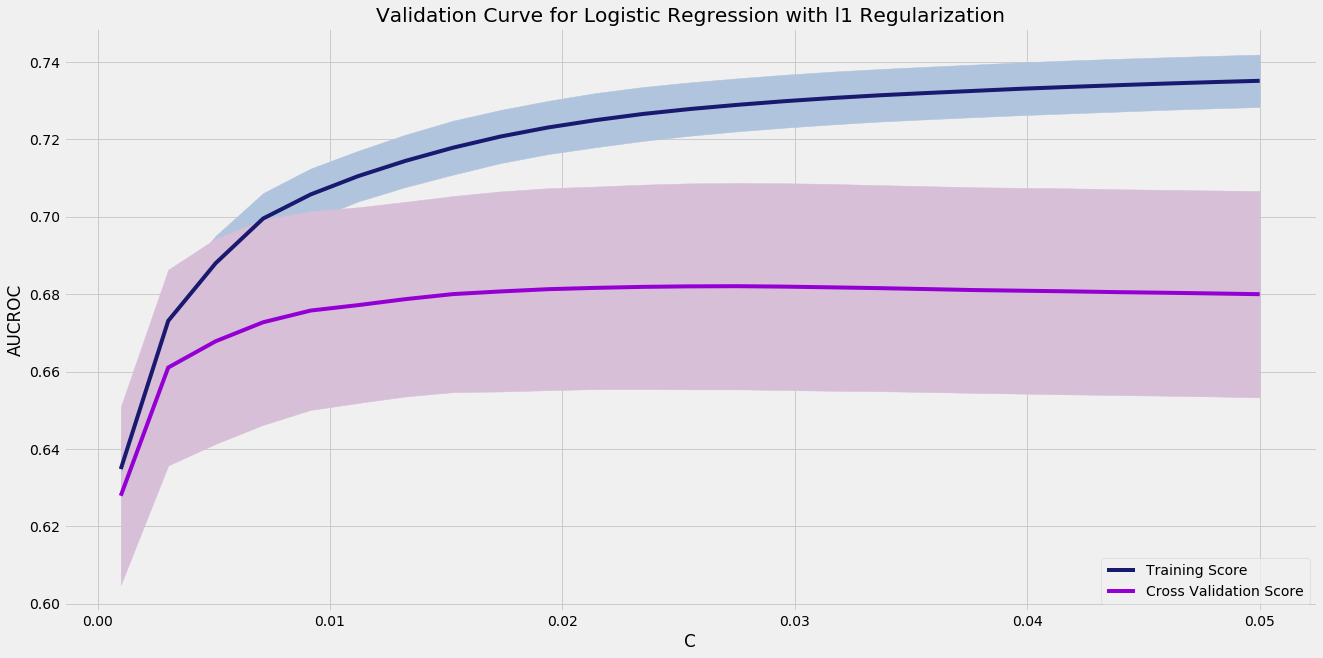

In [60]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.style.use('fivethirtyeight')

# plot mean accuracy scores for training and test sets
plt.plot(param_values,
         train_mean,
         label='Training Score',
         color='midnightblue')

plt.plot(param_values,
         test_mean,
         label='Cross Validation Score',
         color='darkviolet')

# plot accuracy bands for training and test sets
plt.fill_between(param_values, 
                 train_mean - train_std,
                 train_mean + train_std,
                 color='lightsteelblue')

plt.fill_between(param_values,
                 test_mean - test_std,
                 test_mean + test_std,
                 color='thistle')

# create plot
plt.title('Validation Curve for Logistic Regression with l1 Regularization')
plt.xlabel('C')
plt.ylabel('AUCROC')
plt.legend(loc='lower right')
plt.show()       

In [61]:
validation_summary = pd.DataFrame({'C': param_values,
                                   'mean_test_roc_auc': test_mean,
                                   'mean_train_roc_auc': train_mean})

In [62]:
validation_summary[validation_summary['mean_test_roc_auc'] == np.max(validation_summary['mean_test_roc_auc'])]

,C,mean_test_roc_auc,mean_train_roc_auc
13,0.02754,0.68208,0.72894


#### How does this tuned model compare to the baseline `STS` Model

In [63]:
round(roc_auc_score(y_train, predstro_train), 5)

0.69121

#### Key Takeaways
- Fine tuning of hyperparmeter `C` results in `C=0.0275`
- Results in-line (but still lower) than `STS` Model

## Precision-Recall Curve for Tuned Logistic Regression Model
- `Hands On Machine Learning with Scikit-Learn & Tensorflow` by Aurelien Geron pages 83-93
#### How `cross_val_predict` works:
- `cross_val_predict` returns for each element in the input, the prediction that was obtained for that element when it was in the `test` set

- generating vector of probabilities of stroke for cross validated training set

In [64]:
lr_predict_probs = cross_val_predict(LogisticRegression(penalty='l1',
                                                        C=0.0275,
                                                        class_weight='balanced',
                                                        random_state=0,
                                                        solver='liblinear'),
                                     X_train,
                                     y_train,
                                     cv=5,
                                     method='predict_proba',
                                     n_jobs=-1,
                                     verbose=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished


- using `lr_predict_probs` can compute precision and recall for all possible thresholds using the `precision_recall_curve` function
- returns an `numpy.ndarray` with `shape` `(n, 2)` as it returns a probability per class `(0, 1)`
- since we are interested in the `1` class, need to carve our the second column of the `numpy.ndarray`
- add `[:,1]`

In [65]:
type(lr_predict_probs)

numpy.ndarray

In [66]:
lr_predict_probs.shape

(34192, 2)

In [67]:
lr_predict_probs[0:5]

array([[0.57617457, 0.42382543],
       [0.44563527, 0.55436473],
       [0.80741685, 0.19258315],
       [0.6429129 , 0.3570871 ],
       [0.27713951, 0.72286049]])

In [68]:
lr_predict_probs[0:5, 1]

array([0.42382543, 0.55436473, 0.19258315, 0.3570871 , 0.72286049])

#### Generating `precision_recall_curve`

In [69]:
precisions, recalls, thresholds = precision_recall_curve(y_train,
                                                         lr_predict_probs[:, 1])

- `precision` values such that element `i` is the the `precision` of predictions with `score>=threholds[i]` and the last element is `1`

In [70]:
precisions[0:5] # first 5 elements of the numpy array

array([0.01702501, 0.01699626, 0.01699675, 0.01699725, 0.01699775])

In [71]:
precisions[-5:] # last 5 elements of the numpy array

array([0., 0., 0., 0., 1.])

- decreasing `recall` values such that element `i` is the the `precision` of predictions with `score>=threholds[i]` and the last element is `0`

In [72]:
recalls[0:5]

array([1.        , 0.99828179, 0.99828179, 0.99828179, 0.99828179])

In [73]:
recalls[-5:]

array([0., 0., 0., 0., 0.])

- increasing `thresholds` on the decision function used to compute `precision` and `recall`

In [74]:
thresholds[0:5]

array([0.06273918, 0.06296322, 0.06307158, 0.06718925, 0.0679756 ])

In [75]:
thresholds[-5:]

array([0.9400758 , 0.94216516, 0.96201817, 0.96256097, 0.97059538])

### Plotting `precision` and `recall` as functions of `threshold`

In [76]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.title('Precision and Recall versus Threshold')
    plt.xlabel('Threshold')
    plt.legend(loc='upper right')
    plt.ylim([0, 1])

### Precision and Recall versus Threshold for Logistic Regression Model

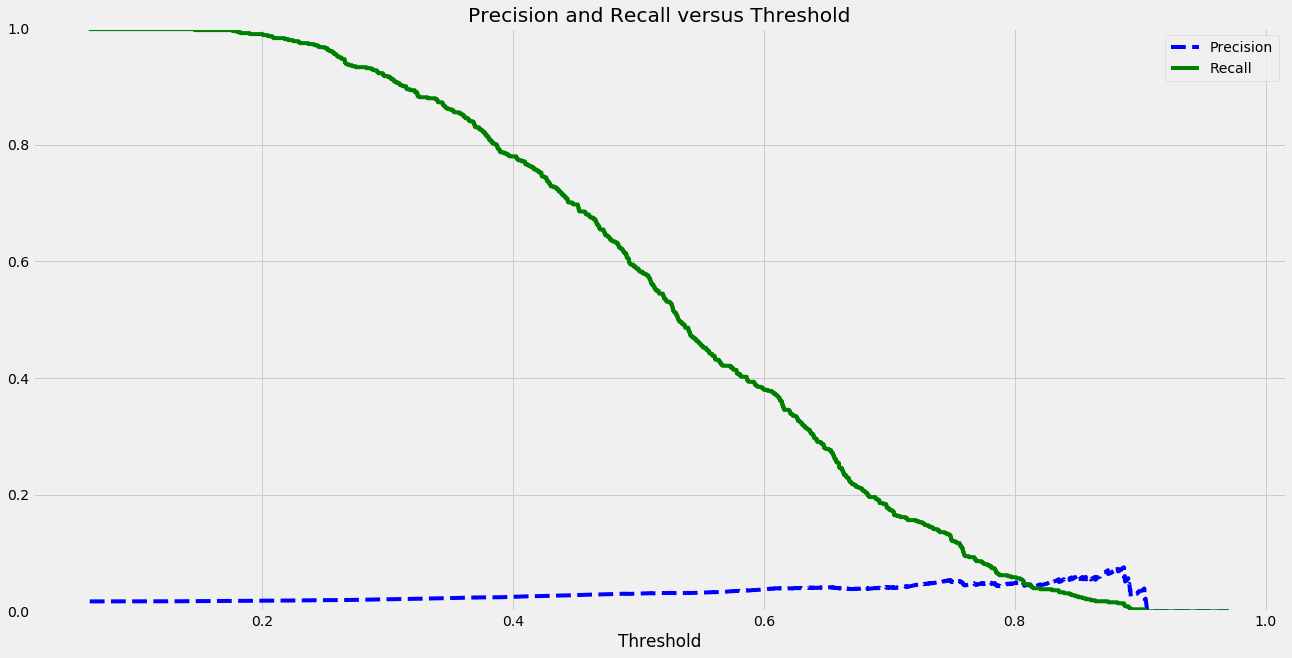

In [77]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

- helper function

In [78]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

- examining specific `threshold`, `Recall` and `Precision` trade-offs
- suppose you wanted a `recall` of `0.80`, what `threshold` will you need and what will the `precision` be?

In [79]:
find_nearest(recalls, 0.80)

(0.8006872852233677, 14806)

In [80]:
print('{0:15} {1:5f}'.format('Recall:', recalls[14806]))
print('{0:15} {1:5f}'.format('Precision:', precisions[14806]))
print('{0:15} {1:5f}'.format('Threshold:', thresholds[14806]))

Recall:         0.800687
Precision:      0.024047
Threshold:      0.385244


- see `Geron` page 90 for additional details

### Precision and Recall versus Threshold for STS Model

In [81]:
sts_precisions, sts_recalls, sts_thresholds = precision_recall_curve(y_train,
                                                                     predstro_train)

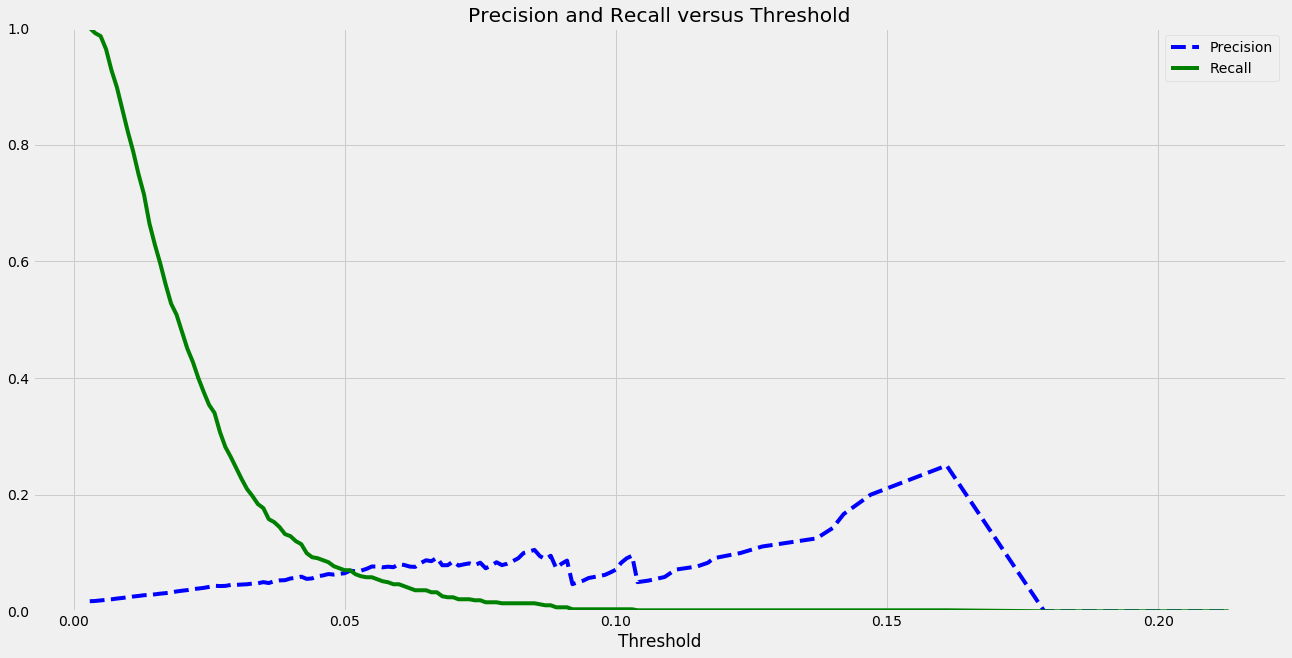

In [82]:
plot_precision_recall_vs_threshold(sts_precisions, sts_recalls, sts_thresholds)
plt.show()

## Precision-Recall Curves
- `Introduction to Machine Learning with Python` by Andreas C. Muller and Sarah Guido pages 289-296
- the closer a `precision-recall curve` stays to the upper-right corner, the better classifier

In [83]:
def plot_precision_recall_curve(precisions, recalls):
    plt.plot(precisions,
             recalls,
             color='blue',
             label='Precision-Recall Curve')
    plt.title('Precision-Recall Curve')
    plt.ylabel('Recall')
    plt.xlabel('Precision')
    plt.legend(loc='upper right')

### `Precision-Recall Curve` for `LogisticRegression` Model

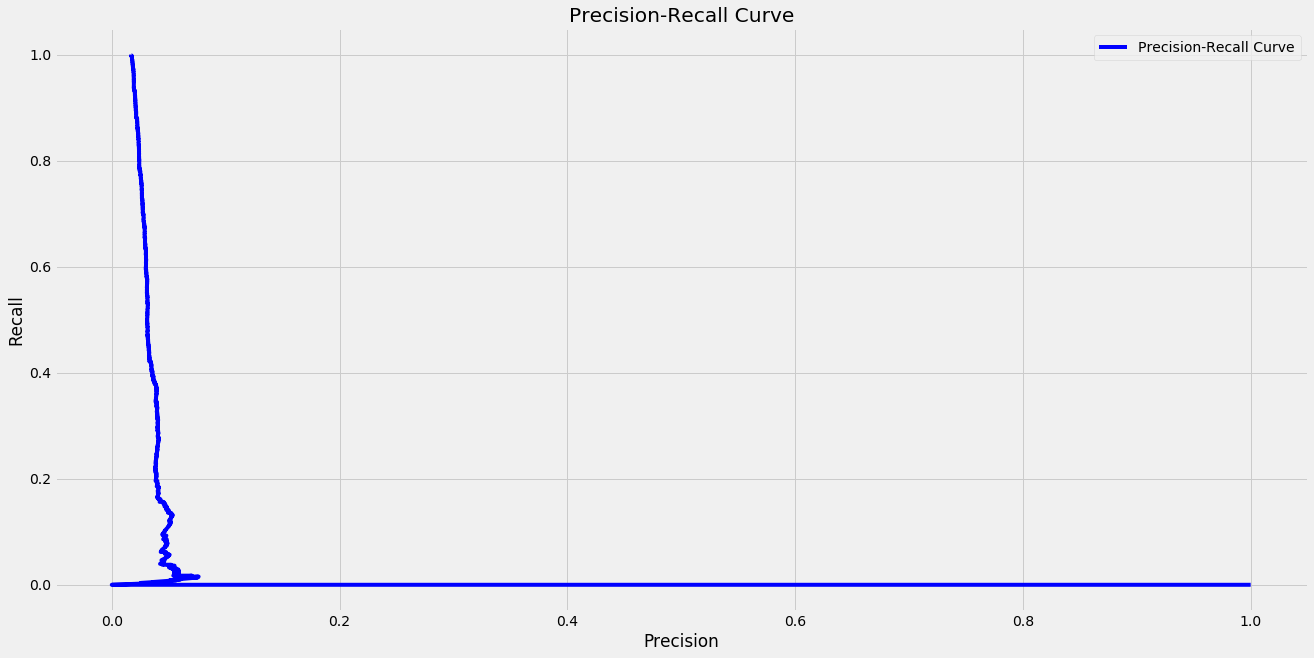

In [84]:
plot_precision_recall_curve(precisions, recalls)
plt.show()

#### Area Under the `Precision-Recall Curve` for `LogisticRegression` Model

In [85]:
round(auc(recalls, precisions), 5)

0.03339

### `Precision-Recall Curve` for `STS` Model

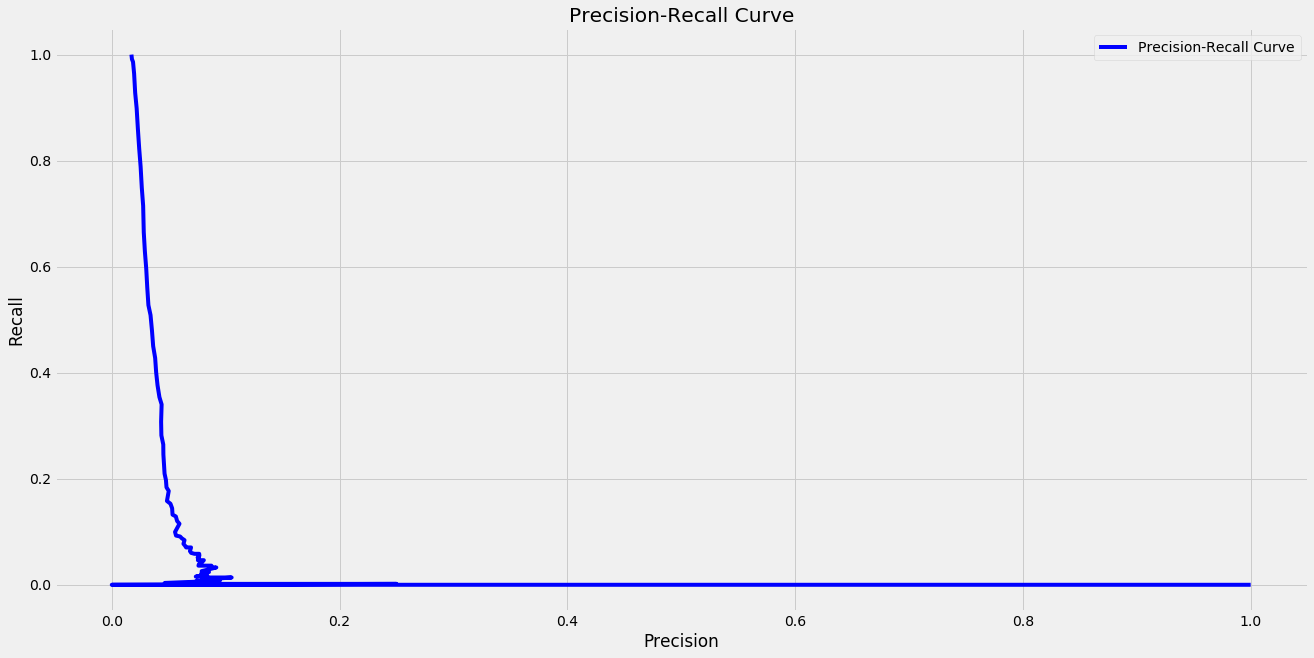

In [86]:
plot_precision_recall_curve(sts_precisions, sts_recalls)
plt.show()

#### Area Under the `Precision-Recall Curve` for `STS` Model

In [87]:
round(auc(sts_recalls, sts_precisions), 5)

0.03801

#### Key Takeaways
- `STS` model is superior to `LogisticRegression` model looking at `Precision-Recall Curves` and `PR AUC`

### Comparing `Logistic Regression` and `STS` Model `Precision-Recall` Curves

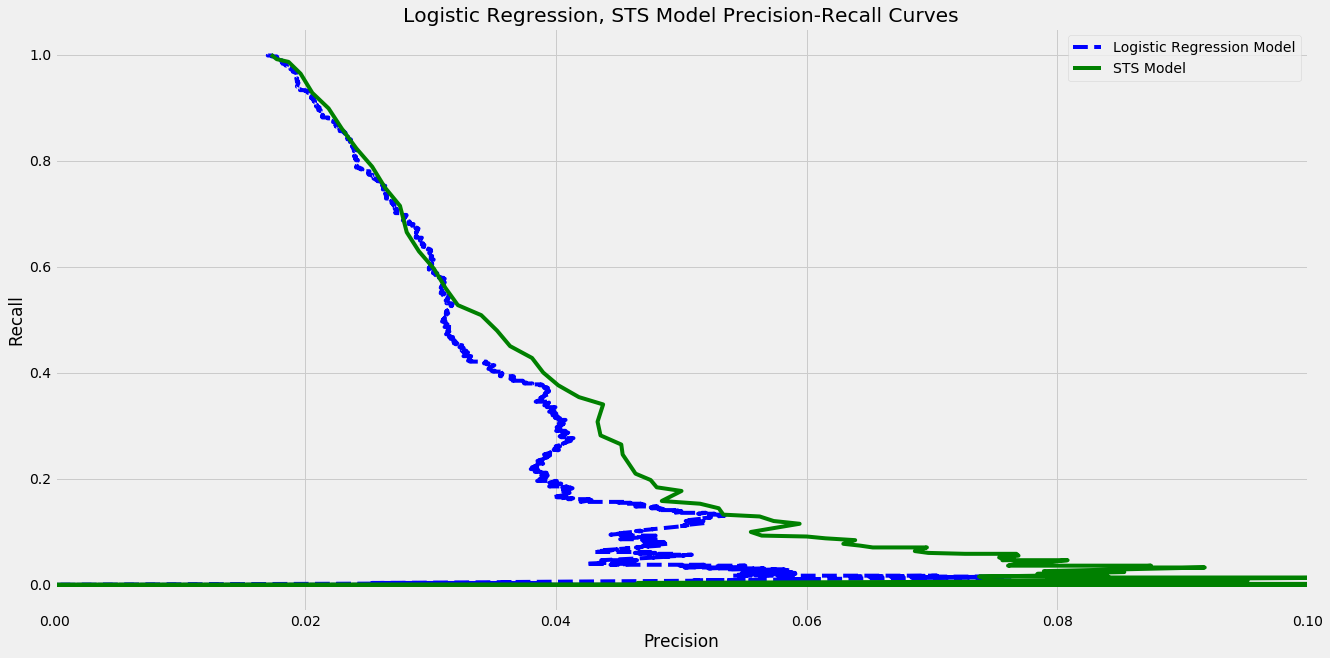

In [88]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.style.use('fivethirtyeight')

# plotting `LogisticRegression` Precision-Recall Curve
plt.plot(precisions,
         recalls,
         'b--',
         label='Logistic Regression Model')

# plotting `STS Model` Precision-Recall Curve
plt.plot(sts_precisions,
         sts_recalls,
         'g-',
         label='STS Model')

plt.title('Logistic Regression, STS Model Precision-Recall Curves')
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.legend(loc='upper right')
plt.xlim([0, 0.10]) # cut off values > 0.10 because they were essentially zero
plt.show()

#### Key Takeaways
- plot clearly shows `STS` model outperperformance over `LogisticRegression`
- can use basic code here to plot `Precision-Recall Curves` from other models on the same plot for comparison

## Receiver Operating Characteristic (`ROC`) Curves
- Albon `11.5` pages 189-192
- a classifier that predicts every observation correctly would look like the solid `gray` line in the plotted `ROC` curves below
- the solid `gray` line goes straight up to the top immediately
- a classifier that predicts at random will appear as the diagonal line
- the better the model, the closer it is to the solid `gray` line
- the `ROC` curve represents the respective `TPR` and `FPR` for every probability threshold

- creating `true` and `false` probabilities

In [89]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train,
                                                               lr_predict_probs[:, 1])

- `plot_roc_curve` function

In [90]:
def plot_roc_curve(fpr, tpr):
    plt.title('Receiver Operating Curve (ROC)')
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls='--')
    plt.plot([0, 0],
             [1, 0],
             c='0.7'),
    plt.plot([1, 1], c='0.7')
    plt.ylabel('True Positive Rate (Recall)')
    plt.xlabel('False Positive Rate')

#### `LogisiticRegression` Model `ROC` Curve

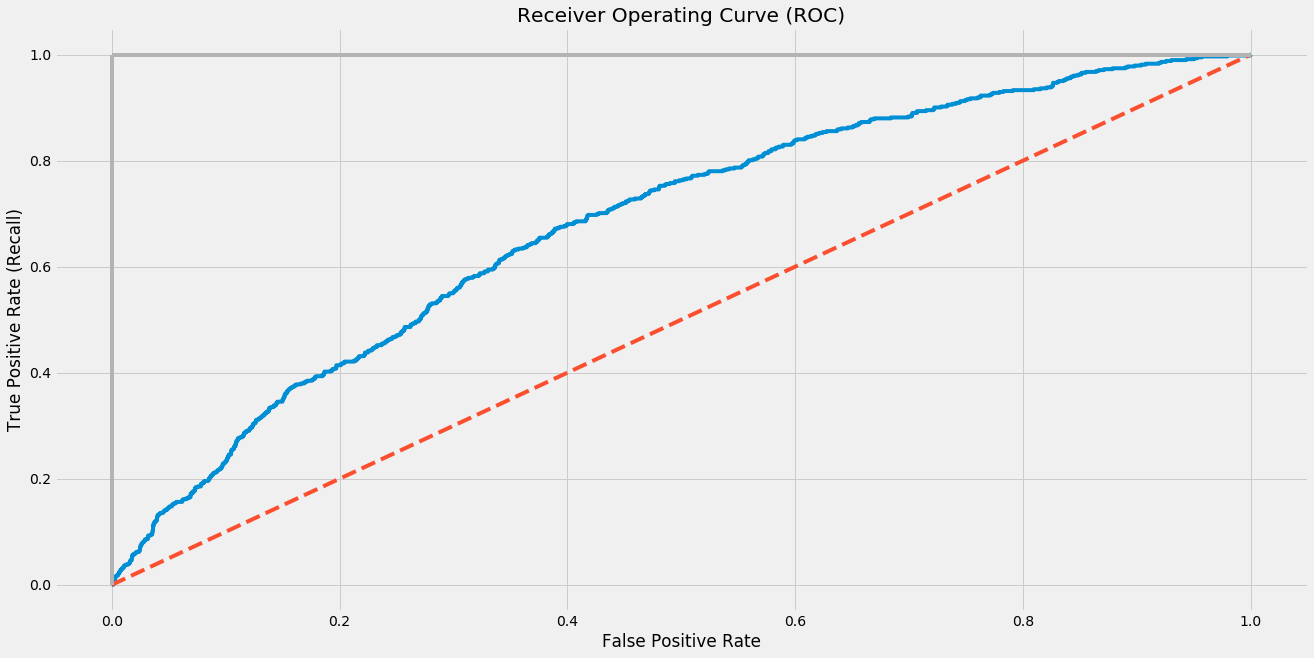

In [91]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.style.use('fivethirtyeight')
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [92]:
round(roc_auc_score(y_train, lr_predict_probs[:, 1]), 5)

0.68109

- suppose you want `recall` in a certain range - what is the `false positive rate` you would have to accept?

In [93]:
lr_roc_curve = pd.DataFrame({'Recall': true_positive_rate,
                             'FPR': false_positive_rate})

- assume you want `recall` around `0.80`

In [94]:
lr_roc_curve[lr_roc_curve['Recall'].between(0.799, 0.801)]

,Recall,FPR
917,0.80069,0.55915
918,0.80069,0.56272


- could have also used the `find_nearest` helper function above

In [95]:
lr_roc_curve[lr_roc_curve['Recall'] == (find_nearest(lr_roc_curve['Recall'], 0.80)[0])]

,Recall,FPR
917,0.80069,0.55915
918,0.80069,0.56272


- suppose you want to know `recall` and `FPR` for a given threshold

In [96]:
np.where(threshold == 0.10)[0]

array([], dtype=int64)

In [97]:
print('{0:15} {1:5f}'.format('Threshold:', threshold[11]))
print('{0:15} {1:5f}'.format('Recall:', true_positive_rate[11]))
print('{0:15} {1:5f}'.format('FPR:', false_positive_rate[11]))

Threshold:      0.890618
Recall:         0.008591
FPR:            0.002470


#### `STS` Model `ROC` Curve

In [98]:
sts_fpr, sts_tpr, threshold = roc_curve(y_train,
                                        predstro_train)

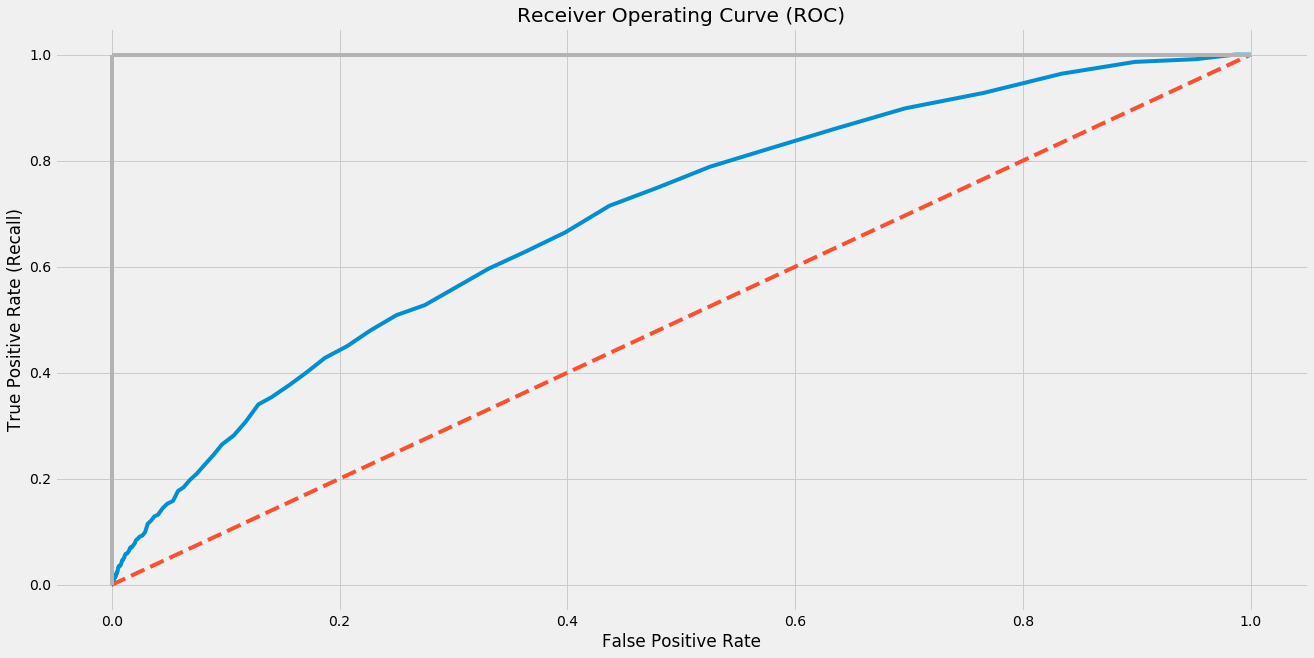

In [99]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.style.use('fivethirtyeight')
plot_roc_curve(sts_fpr, sts_tpr)
plt.show()

In [100]:
round(roc_auc_score(y_train, predstro_train), 5)

0.69121

#### Key Takeaways
- `STS` Model slightly outperforms `LogisticRegression`